In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics



In [2]:
df = yf.download(tickers = "EURUSD=X",period = "20y",interval = "1d",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
df =df.drop(['Volume'],1)
df =df.drop(['Open'],1)
df =df.drop(['High'],1)
df =df.drop(['Low'],1)
df = df[:-7]
print(df)

[*********************100%***********************]  1 of 1 completed
               Close
Date                
2003-12-01  1.196501
2003-12-02  1.208897
2003-12-03  1.212298
2003-12-04  1.208094
2003-12-05  1.218695
...              ...
2022-06-24  1.052011
2022-06-27  1.056613
2022-06-28  1.058089
2022-06-29  1.052355
2022-06-30  1.044659

[4820 rows x 1 columns]


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_892\2908193313.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_892\2908193313.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Open'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_892\2908193313.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['High'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_892\2908193313.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Low'],1)


In [3]:
for i in range(1, 7):
    df[f"Close{i}"] = df["Close"].shift(-i)
    
df = df[:-6]
#print(df)   

In [4]:
forecast_out = int(1)
df['PredictionClose'] = df['Close6'].shift(-forecast_out)
print(df)

               Close    Close1    Close2    Close3    Close4    Close5  \
Date                                                                     
2003-12-01  1.196501  1.208897  1.212298  1.208094  1.218695  1.222001   
2003-12-02  1.208897  1.212298  1.208094  1.218695  1.222001  1.224995   
2003-12-03  1.212298  1.208094  1.218695  1.222001  1.224995  1.219096   
2003-12-04  1.208094  1.218695  1.222001  1.224995  1.219096  1.222404   
2003-12-05  1.218695  1.222001  1.224995  1.219096  1.222404  1.227898   
...              ...       ...       ...       ...       ...       ...   
2022-06-16  1.045620  1.054685  1.049142  1.052078  1.053264  1.056412   
2022-06-17  1.054685  1.049142  1.052078  1.053264  1.056412  1.052011   
2022-06-20  1.049142  1.052078  1.053264  1.056412  1.052011  1.056613   
2022-06-21  1.052078  1.053264  1.056412  1.052011  1.056613  1.058089   
2022-06-22  1.053264  1.056412  1.052011  1.056613  1.058089  1.052355   

              Close6  PredictionClose

In [5]:
X = np.array(df.drop(['PredictionClose'],1))
#X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
df = df[:-forecast_out]
#print(df)


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_892\3182839119.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [6]:
features = X.shape[1]
print( features)

test_point = np.round(len(df)*0.1)
test_index = int(len(df)-test_point)

train = df.iloc[:test_index]
test = df.iloc[test_index:]

X_train, Y_train = train.iloc[:, :-1], pd.DataFrame(train.iloc[:, -1])
X_test, Y_test = test.iloc[:, :-1], pd.DataFrame(test.iloc[:, -1])

length = 1

trainX = np.array([X_train], order='C')
trainX.resize((X_train.shape[0], length, features))
testX = np.array([X_test], order='C')
testX.resize((X_test.shape[0], length, features))

forecastX = np.array([X_forecast], order='C')
forecastX.resize((X_forecast.shape[0], length, features))

7


In [7]:
# Training
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model = Sequential()
model.add(LSTM(features, input_shape=(length,features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(trainX, Y_train,
          epochs=100,
          batch_size=10, 
          validation_data=(testX, Y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
434/434 [==============================] - 2s 2ms/step - loss: 0.2075 - val_loss: 6.4101e-05
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 1.9685e-04 - val_loss: 6.6239e-05
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 1.9680e-04 - val_loss: 6.4971e-05
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 1.9294e-04 - val_loss: 7.8882e-05
Epoch 5/100
434/434 [==============================] - 1s 1ms/step - loss: 1.9346e-04 - val_loss: 7.3108e-05
Epoch 6/100
434/434 [==============================] - 1s 1ms/step - loss: 1.9465e-04 - val_loss: 6.6917e-05
Epoch 6: early stopping


<AxesSubplot:>

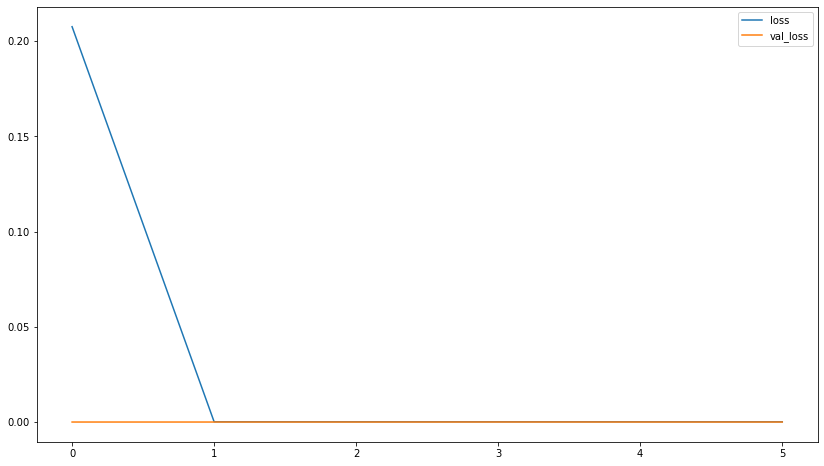

In [8]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize=(14,8))

In [9]:
#Testing
testpredictions = model.predict(testX)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

16/16 [==============================] - 0s 1000us/step
R2 Score is:  0.9730533259528523
Mean Squared Error is:  6.691693723199093e-05
Root Mean Squared Error is:  0.008180277332217469
Mean Absolute Error is:  0.006354566423412172
Mean Absolute Percentage Error is:  0.005508565052917939


In [18]:
forecast_prediction = []
temp =  model.predict(forecastX)
forecast_prediction.append(temp)
features = np.roll(forecastX, -1)
features[:, : , -1] = temp
for i in range(23):
    predicted_value = model.predict(features)
    features = np.roll(features, -1)
    features[:, :, -1] = predicted_value
    forecast_prediction.append(predicted_value)

1/1 [==============================] - 0s 17ms/step


In [19]:
forecast_prediction = np.asarray(forecast_prediction).reshape(-1)
forecast_prediction

array([1.0566026, 1.0533179, 1.0526022, 1.0545611, 1.0538282, 1.0531849,
       1.0549328, 1.0545993, 1.0545715, 1.0552104, 1.0552651, 1.0553613,
       1.0558038, 1.0559348, 1.0561044, 1.0563967, 1.0565792, 1.056769 ,
       1.057012 , 1.057204 , 1.0573995, 1.0576144, 1.0578088, 1.0580022],
      dtype=float32)

Max = 1.0580022
Min = 1.0526022


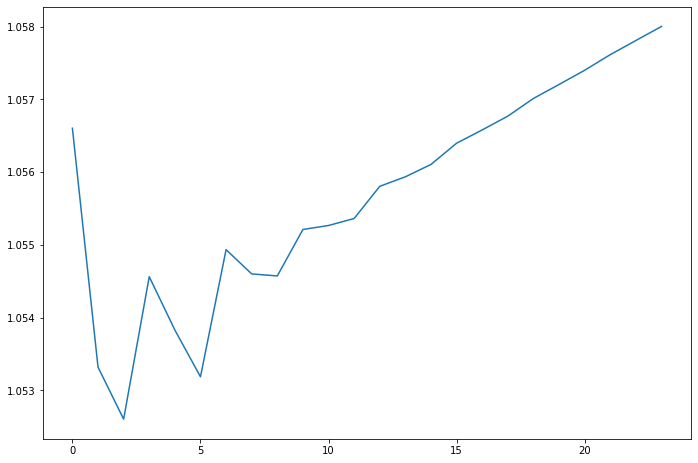

In [20]:
print('Max =',max(forecast_prediction))
print('Min =',min(forecast_prediction))
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)